# Learning rates: How much data do you need?

Do you have enough data samples to build a good machine learning model? Examining the learning rate of your model will help you decide whether it could be improved by having more data.

Here we repeat the logistic regression model on the Wisconsin Breast Cancer Diagnostic data set. We set out regularisation parameter (c) to 1, from our previous experiment, and then look at the effect of restricting our training set to varying sizes (the test set remains the same size, at 25% of our data).

We can see that as we increase our training set size the accuracy of fitting the training set reduces (it is easier to over-fit smaller data sets), and increase the accuracy of the test set. When we reach the most data we have there has not yet been a plateau in the accuracy of our test set, and the test set accuracy is significantly poorer than the training set accuracy (at out optimum regularisation for this amount of data). These two observations suggest that we would benefit from having more data for the model. If we did have more data then we should the experiment to find the optimum regularisation: generally as data set size increases, the need for regularisation reduces.

Different types of machine learning model may have different learning rates. This may influence your choice of model.

     training_accuracy  test_accuracy    n
n                                         
25                 1.0       0.930070   25
50                 1.0       0.944056   50
75                 1.0       0.951049   75
100                1.0       0.951049  100
125                1.0       0.958042  125
150                1.0       0.958042  150
175                1.0       0.958042  175
200                1.0       0.958042  200
225                1.0       0.958042  225
250                1.0       0.958042  250
275                1.0       0.958042  275
300                1.0       0.958042  300
325                1.0       0.958042  325
350                1.0       0.958042  350
375                1.0       0.958042  375
400                1.0       0.951049  400
425                1.0       0.958042  425


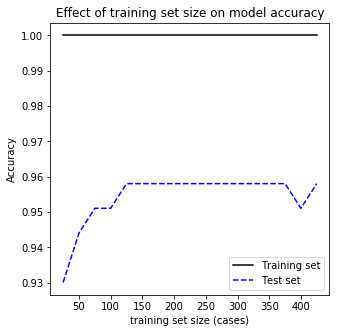

In [5]:
# import required modules

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_diagnostic_performance (actual_predicted):
    """Here we truncate calulcation of results just to accuracy measurement"""
    
    # Calculate results

    test_correct = actual_predicted[:, 0] == actual_predicted[:, 1]
    accuracy = np.average(test_correct)
    
    # Add results to dictionary
    performance = {}
    performance['accuracy'] = accuracy
    return performance

def chart_results(results):
    x = results['n']
    y1 = results['training_accuracy']
    y2 = results['test_accuracy']
    
    # Create figure
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.plot(x,y1, color='k',linestyle='solid', label = 'Training set')
    ax.plot(x,y2, color='b',linestyle='dashed', label = 'Test set')    
    ax.set_xlabel('training set size (cases)')
    ax.set_ylabel('Accuracy')
    plt.title('Effect of training set size on model accuracy')
    plt.legend()
    plt.show()

def load_data ():
    """Load the data set. Here we load the Breast Cancer Wisconsin (Diagnostic)
    Data Set. Data could be loaded from other sources though the structure
    should be compatible with thi sdata set, that is an object with the 
    following attribtes:
        .data (holds feature data)
        .feature_names (holds feature titles)
        .target_names (holds outcome classification names)
        .target (holds classification as zero-based number)
        .DESCR (holds text-based description of data set)"""
    
    data_set = datasets.load_breast_cancer()
    return data_set

def normalise (X_train,X_test):
    """Normalise X data, so that training set has mean of zero and standard
    deviation of one"""
    
    # Initialise a new scaling object for normalising input data
    sc=StandardScaler() 
    # Set up the scaler just on the training set
    sc.fit(X_train)
    # Apply the scaler to the training and test sets
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    return X_train_std, X_test_std

def print_diagnostic_results (performance):
    """Iterate through, and print, the performance metrics dictionary"""
    
    print('\nMachine learning diagnostic performance measures:')
    print('-------------------------------------------------')
    for key, value in performance.items():
        print (key,'= %0.3f' %value) # print 3 decimal places
    return

def split_data (data_set, split, n):
    """Extract X and y data from data_set object, and split into tarining and
    test data. Split defaults to 75% training, 25% test if not other value 
    passed to function"""
    
    X=data_set.data
    y=data_set.target
    X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=split)
    X_train = X_train[0:n]
    y_train = y_train[0:n]
    return X_train,X_test,y_train,y_test

def test_model(model, X, y):
    """Return predicted y given X (attributes)"""
    
    y_pred = model.predict(X)
    test_results = np.vstack((y, y_pred)).T
    return test_results

def train_model (X, y):
    """Train the model """
    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(C=1000)
    model.fit(X, y)
    return model

###### Main code #######

# Load data
data_set = load_data()

# List of regularisation values
number_of_training_points = range(25, 450, 25)

# Set up empty lists to record results
training_accuracy = []
test_accuracy = []
n_results = [] # record c

for n in number_of_training_points:
    # Repeat ml model/prediction 1000 times for each different number of runs
    for i in range(1000):
        
        # Split data into training and test sets
        X_train,X_test,y_train,y_test = split_data(data_set, 0.25, n)

        # Normalise data
        X_train_std, X_test_std = normalise(X_train,X_test)
        # Repeat test 1000x per level of c
        n_results.append(n)
        
        # Train model
        model = train_model(X_train_std,y_train)

        # Produce results for training set
        test_results = test_model(model, X_train_std, y_train)
        performance = calculate_diagnostic_performance(test_results)
        training_accuracy.append(performance['accuracy'])

        # Produce results for test set
        test_results = test_model(model, X_test_std, y_test)
        performance = calculate_diagnostic_performance(test_results)
        test_accuracy.append(performance['accuracy'])

results = pd.DataFrame()
results['n'] = n_results
results['training_accuracy'] = training_accuracy
results['test_accuracy'] = test_accuracy
summary = results.groupby('n').median()
summary['n'] = list(summary.index)

print (summary)
chart_results (summary)